<center>
    <h1><font size="16">Especialización en Estadística</font></h1>
    <h1><font size="12">SERIES DE TIEMPO</font></h1>
</center>

<h2>🛠️ Taller práctico: Descomposición y métodos clásicos de suavizamiento</h2>

<h3>📋 Objetivo general</h3>

Aplicar técnicas de descomposición y métodos de suavizamiento (medias móviles y exponenciales) a series temporales reales para interpretar su estructura, visualizar patrones y construir pronósticos simples.

---

<h3>🔧 Requisitos previos</h3>

- Haber cargado las siguientes librerías:


In [1]:
library(fpp3)
library(forecast)
library(slider)
library(ggplot2)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────── fpp3 1.0.1 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.6
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.1     ✔ feasts      0.4.1
✔ lubridate   1.9.4     ✔ fable       0.4.1
✔ ggplot2     3.5.1     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



<h3> 📌 Parte 1: Cargar y explorar los datos</h3>

**▶️ Actividad 1: Selección y visualización de la serie**

- Cargar una serie de tiempo real (sugerencia: `AirPassengers`, `aus_retail`, `gas` o una serie propia).
- Visualizar la serie y explorar su comportamiento.


Plot variable not specified, automatically selected `.vars = value`


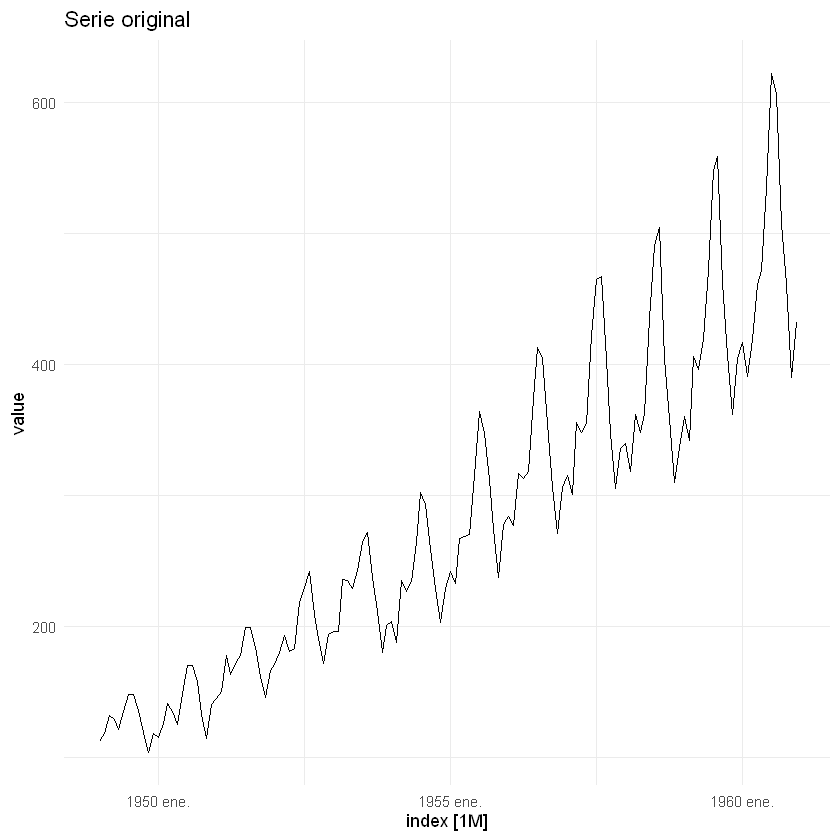

In [2]:
# Usamos AirPassengers como ejemplo
serie <- as_tsibble(AirPassengers)

autoplot(serie) +
  ggtitle("Serie original") +
  theme_minimal()

<h3>📌 Parte 2: Descomposición</h3>

**▶️ Actividad 2: Descomposición aditiva y multiplicativa**

- Aplicar `decompose()` con ambos tipos y comparar gráficamente.


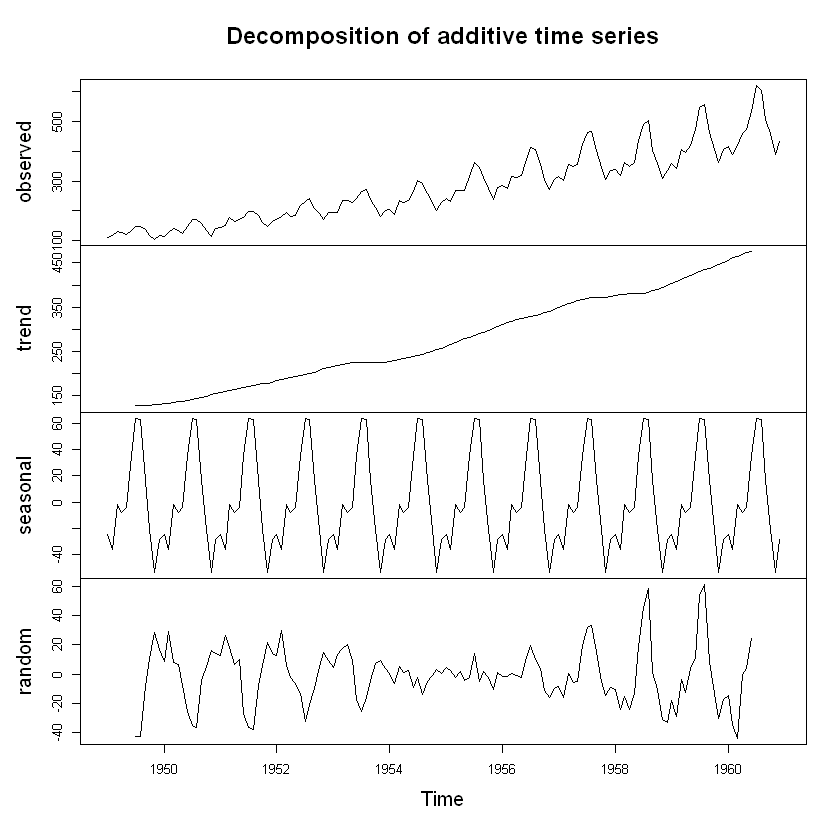

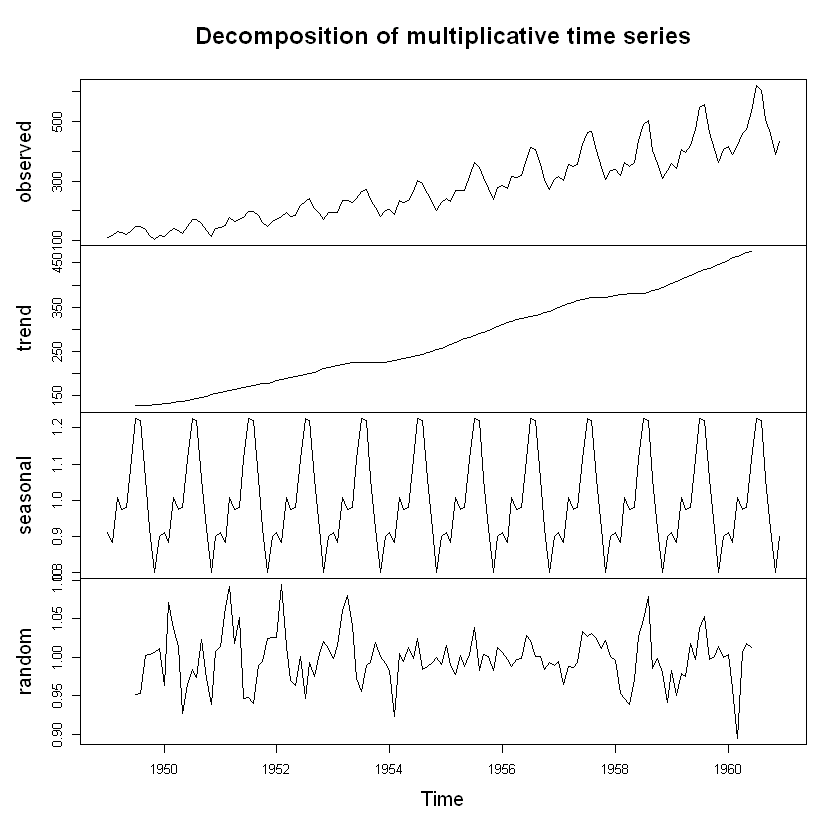

In [3]:
serie_ts <- AirPassengers  # objeto ts para decompose()

desc_add <- decompose(serie_ts, type = "additive")
desc_mult <- decompose(serie_ts, type = "multiplicative")

plot(desc_add)
plot(desc_mult)

**▶️ Actividad 3: Descomposición STL**

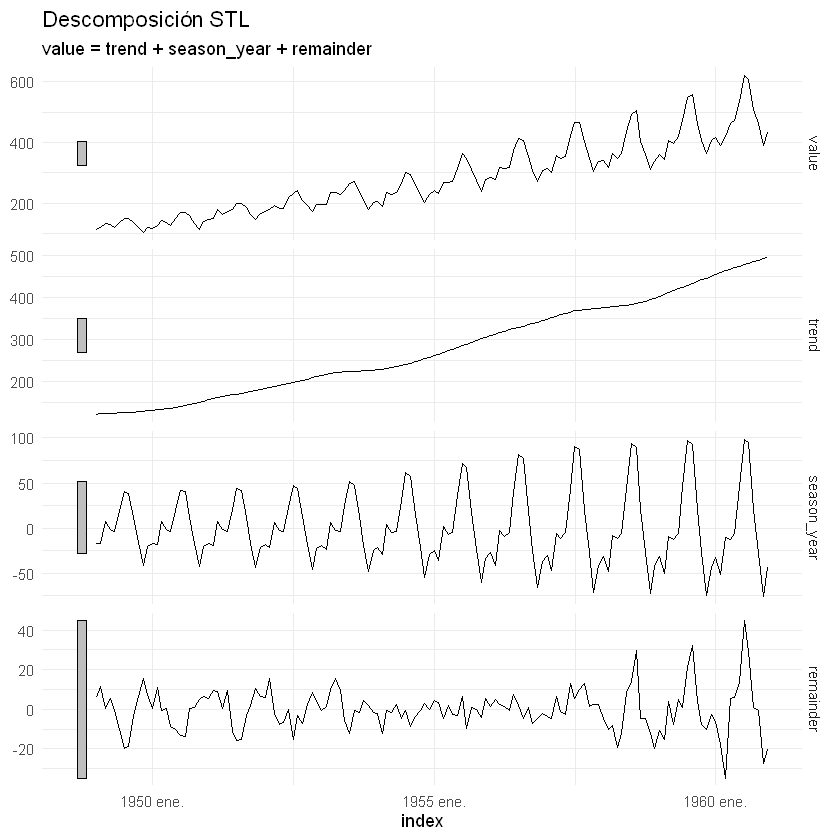

In [4]:
serie %>%
  model(stl_mod = STL(value)) %>%
  components() %>%
  autoplot() +
  ggtitle("Descomposición STL") +
  theme_minimal()


**📌 Pregunta guía:** ¿Cuál descomposición explica mejor los patrones visibles en la serie?

<h3> 📌 Parte 3: Medias móviles</h3>

**▶️ Actividad 4: Media móvil simple**

- Aplicar media móvil centrada con `slider` y visualizar junto a la serie original.


Warning message:
"Removed 11 rows containing missing values or values outside the scale range (`geom_line()`)."


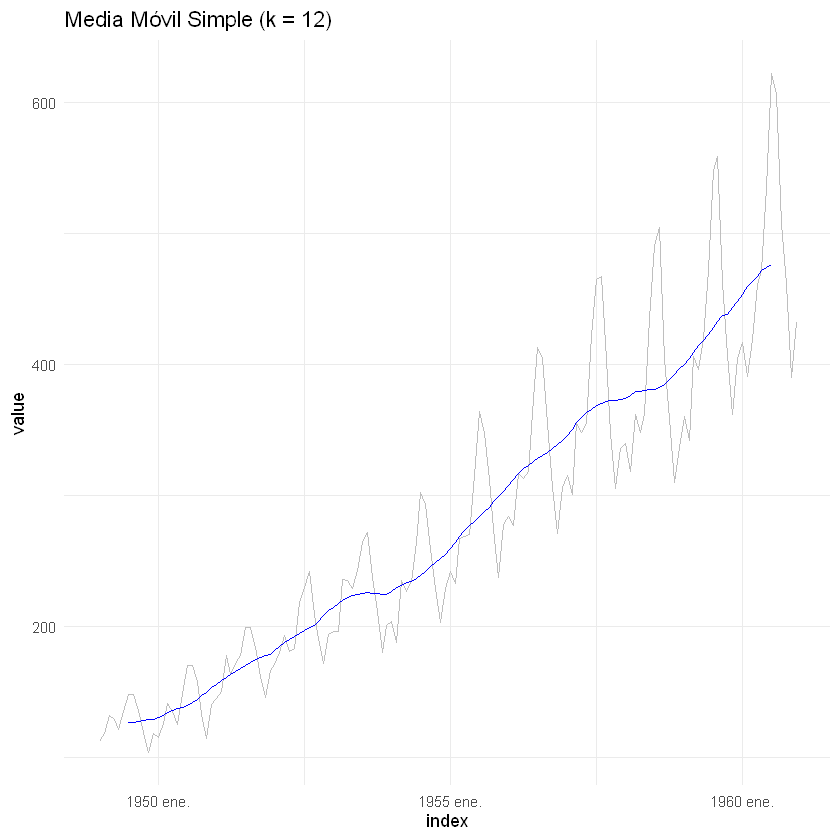

In [5]:
serie %>%
  mutate(MMS = slide_dbl(value, mean, .before = 6, .after = 5, .complete = TRUE)) %>%
  ggplot(aes(x = index)) +
  geom_line(aes(y = value), color = "gray") +
  geom_line(aes(y = MMS), color = "blue") +
  labs(title = "Media Móvil Simple (k = 12)") +
  theme_minimal()

**▶️ Actividad 5: Media móvil ponderada**

- Definir pesos personalizados y aplicar función con `slide_dbl`.


Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_line()`)."


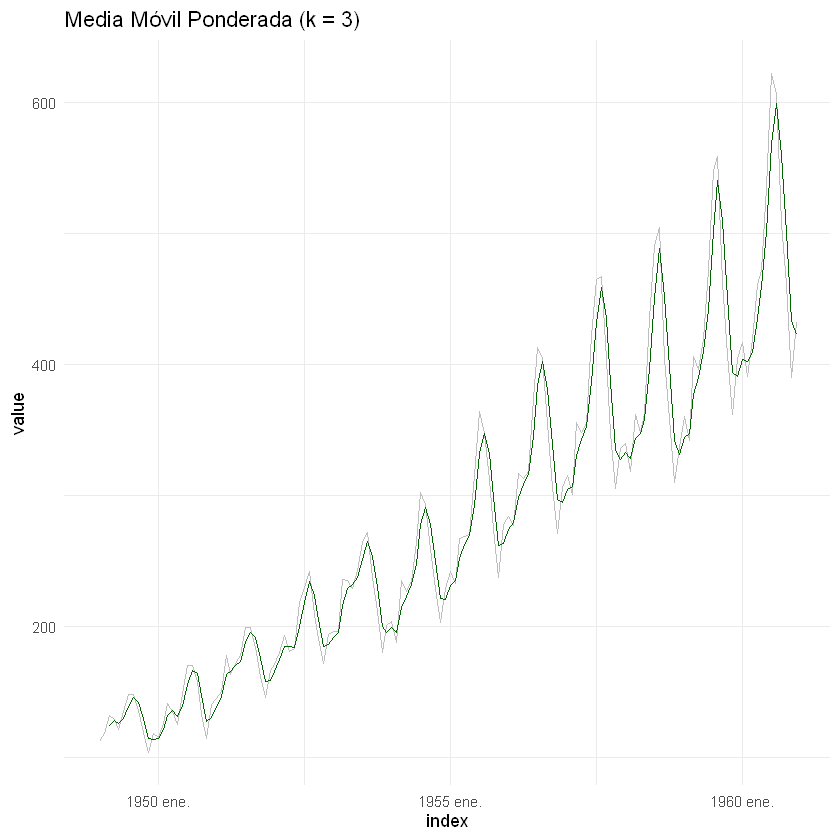

In [6]:
pesos <- c(3, 2, 1) / 6

media_ponderada <- function(x) {
  if (length(x) < 3 || any(is.na(x))) return(NA_real_)
  sum(tail(x, 3) * rev(pesos))
}

serie %>%
  mutate(MMP = slide_dbl(value, media_ponderada, .before = 2, .complete = TRUE)) %>%
  ggplot(aes(x = index)) +
  geom_line(aes(y = value), color = "gray") +
  geom_line(aes(y = MMP), color = "darkgreen") +
  labs(title = "Media Móvil Ponderada (k = 3)") +
  theme_minimal()


<h3>📌 Parte 4: Suavizamiento exponencial</h3>

**▶️ Actividad 6: SES y Holt con `forecast`**


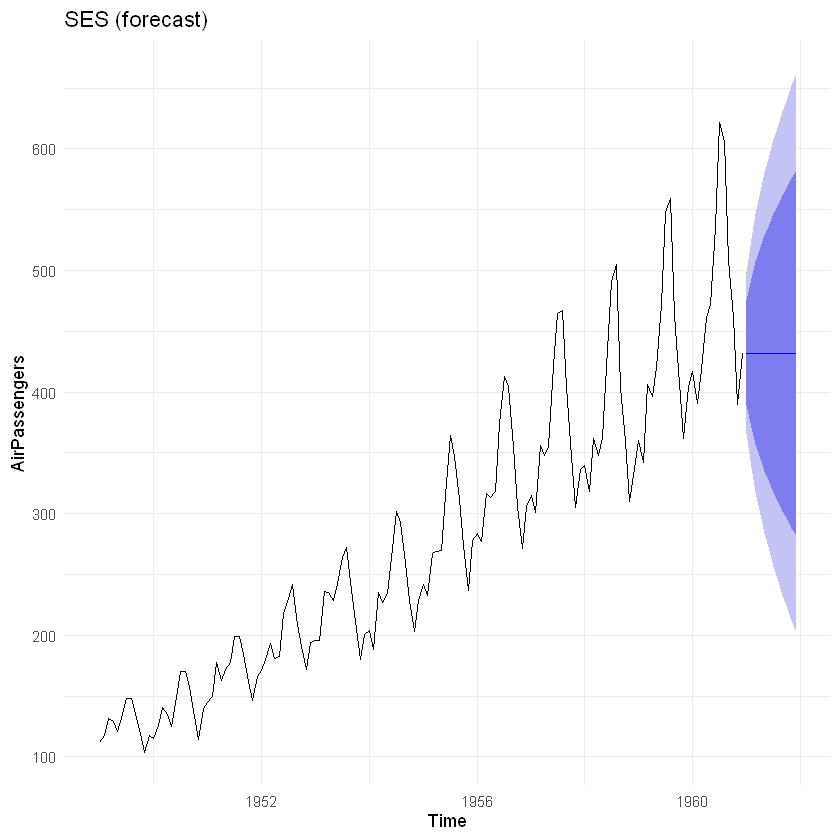

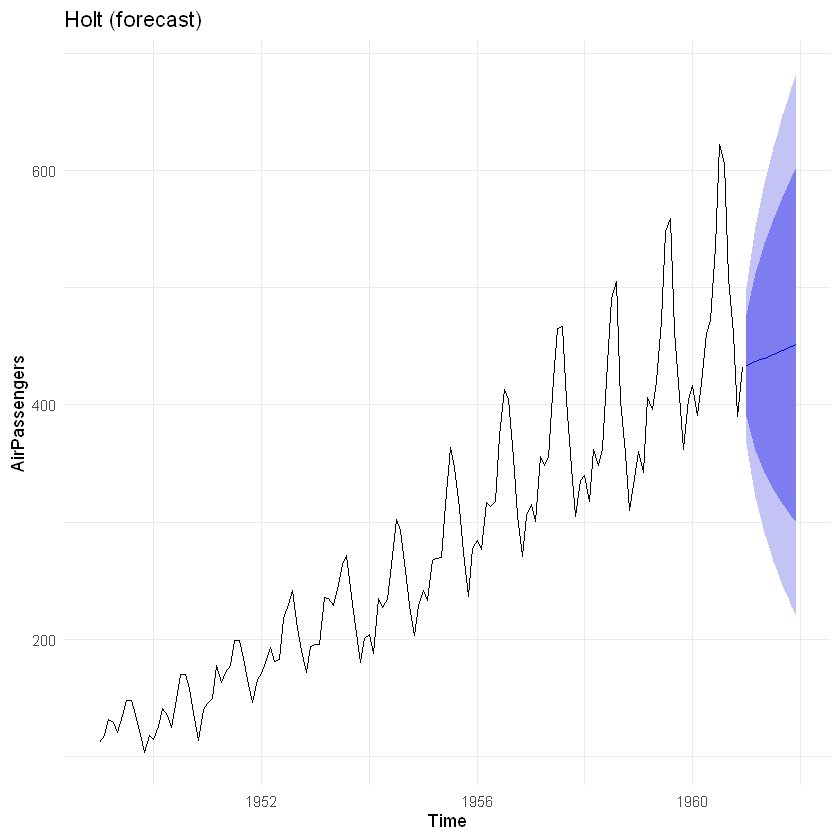

In [7]:
modelo_ses <- ses(AirPassengers, h = 12)
modelo_holt <- holt(AirPassengers, h = 12)

autoplot(modelo_ses) + ggtitle("SES (forecast)") + theme_minimal()
autoplot(modelo_holt) + ggtitle("Holt (forecast)") + theme_minimal()


**▶️ Actividad 7: SES y Holt con `fpp3::ETS()`**

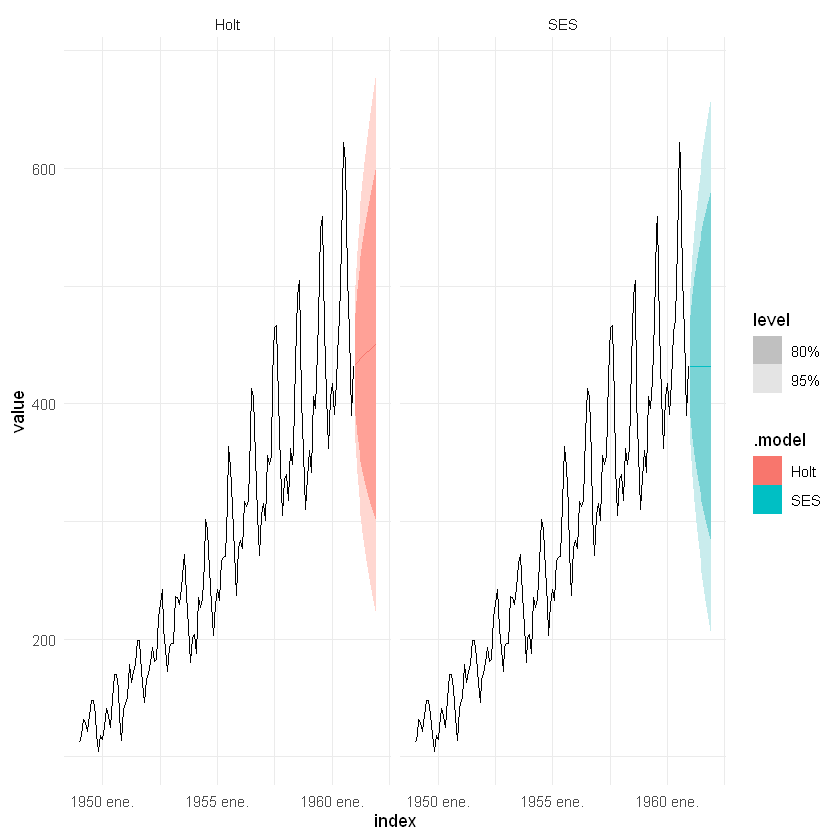

In [8]:
serie %>%
  model(
    SES = ETS(value ~ error("A") + trend("N") + season("N")),
    Holt = ETS(value ~ error("A") + trend("A") + season("N"))
  ) %>%
  forecast(h = 12) %>%
  autoplot(serie) +
  facet_wrap(~.model) +
  theme_minimal()


<h2> 💬 Preguntas para discusión o foro</h2>

1. ¿Cuál método suaviza mejor la serie sin perder estructura relevante?
2. ¿En qué casos la descomposición clásica falla o se queda corta?
3. ¿Qué ventajas prácticas aporta STL frente a las alternativas tradicionales?
4. ¿Cuál técnica consideras más útil en tu campo profesional?
